<a href="https://colab.research.google.com/github/yooniicode/24_dataSci_finalProject/blob/main/talmo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os

root_dir = "/content/gdrive/MyDrive/School Subjects/Data Science/DS_teampj/"

# Checking if our specified directory exists
os.path.exists(root_dir)

True

In [ ]:
import pandas as pd

# Paths to the downloaded files
data_path = os.path.join(root_dir, "Predicting_HairLoss.csv")

# Load data
df = pd.read_csv(data_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [ ]:
df_ini = pd.read_csv(data_path)

In [ ]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import FactorAnalysis
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [ ]:
df.describe(include='all')

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
count,999.000000,999,999,999,999,999,999,999.000000,999,999,999,999,999.000000
unique,NaN,2,2,11,11,11,3,NaN,2,2,2,2,NaN
top,NaN,Yes,Yes,No Data,Rogaine,Zinc Deficiency,Moderate,NaN,No,Yes,Yes,No,NaN
freq,NaN,522,509,110,116,108,351,NaN,507,508,519,527,NaN
mean,153354.673674,NaN,NaN,NaN,NaN,NaN,NaN,34.188188,NaN,NaN,NaN,NaN,0.497497
std,25516.041985,NaN,NaN,NaN,NaN,NaN,NaN,9.377980,NaN,NaN,NaN,NaN,0.500244
min,110003.000000,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.000000
25%,131867.500000,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,0.000000
50%,152951.000000,NaN,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,0.000000
75%,174969.000000,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,1.000000


In [ ]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [ ]:
# the distribution of the categorical variable grouped by the target class

target_counts = df['Hair_Loss'].value_counts()
target_ratio = df['Hair_Loss'].value_counts(normalize=True)

print(f"target_counts ['0'] = {target_counts[0]}  target_counts ['1'] = {target_counts[1]}")
print(f"target_ratio ['0'] = {round(target_ratio[0]*100,2)} %  target_ratio ['1'] = {round(target_ratio[1]*100)} %")

target_counts ['0'] = 502  target_counts ['1'] = 497
target_ratio ['0'] = 50.25 %  target_ratio ['1'] = 50 %


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        999 non-null    int64 
 1   Genetics                  999 non-null    object
 2   Hormonal_Changes          999 non-null    object
 3   Medical_Conditions        999 non-null    object
 4   Medications_&_Treatments  999 non-null    object
 5   Nutritional_Deficiencies  999 non-null    object
 6   Stress                    999 non-null    object
 7   Age                       999 non-null    int64 
 8   Poor_Hair_Care_Habits     999 non-null    object
 9   Environmental_Factors     999 non-null    object
 10  Smoking                   999 non-null    object
 11  Weight_Loss               999 non-null    object
 12  Hair_Loss                 999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


In [ ]:
print("Continuous Variables","\n")
continous_vars=df.describe().columns
print(continous_vars)

print("Categorical Variables","\n")
categorical_vars=df.describe(include=[object]).columns
print(categorical_vars)

Continuous Variables 

Index(['Id', 'Age', 'Hair_Loss'], dtype='object')
Categorical Variables 

Index(['Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_&_Treatments', 'Nutritional_Deficiencies', 'Stress',
       'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss'],
      dtype='object')


Continuous Variables Visualizationz 



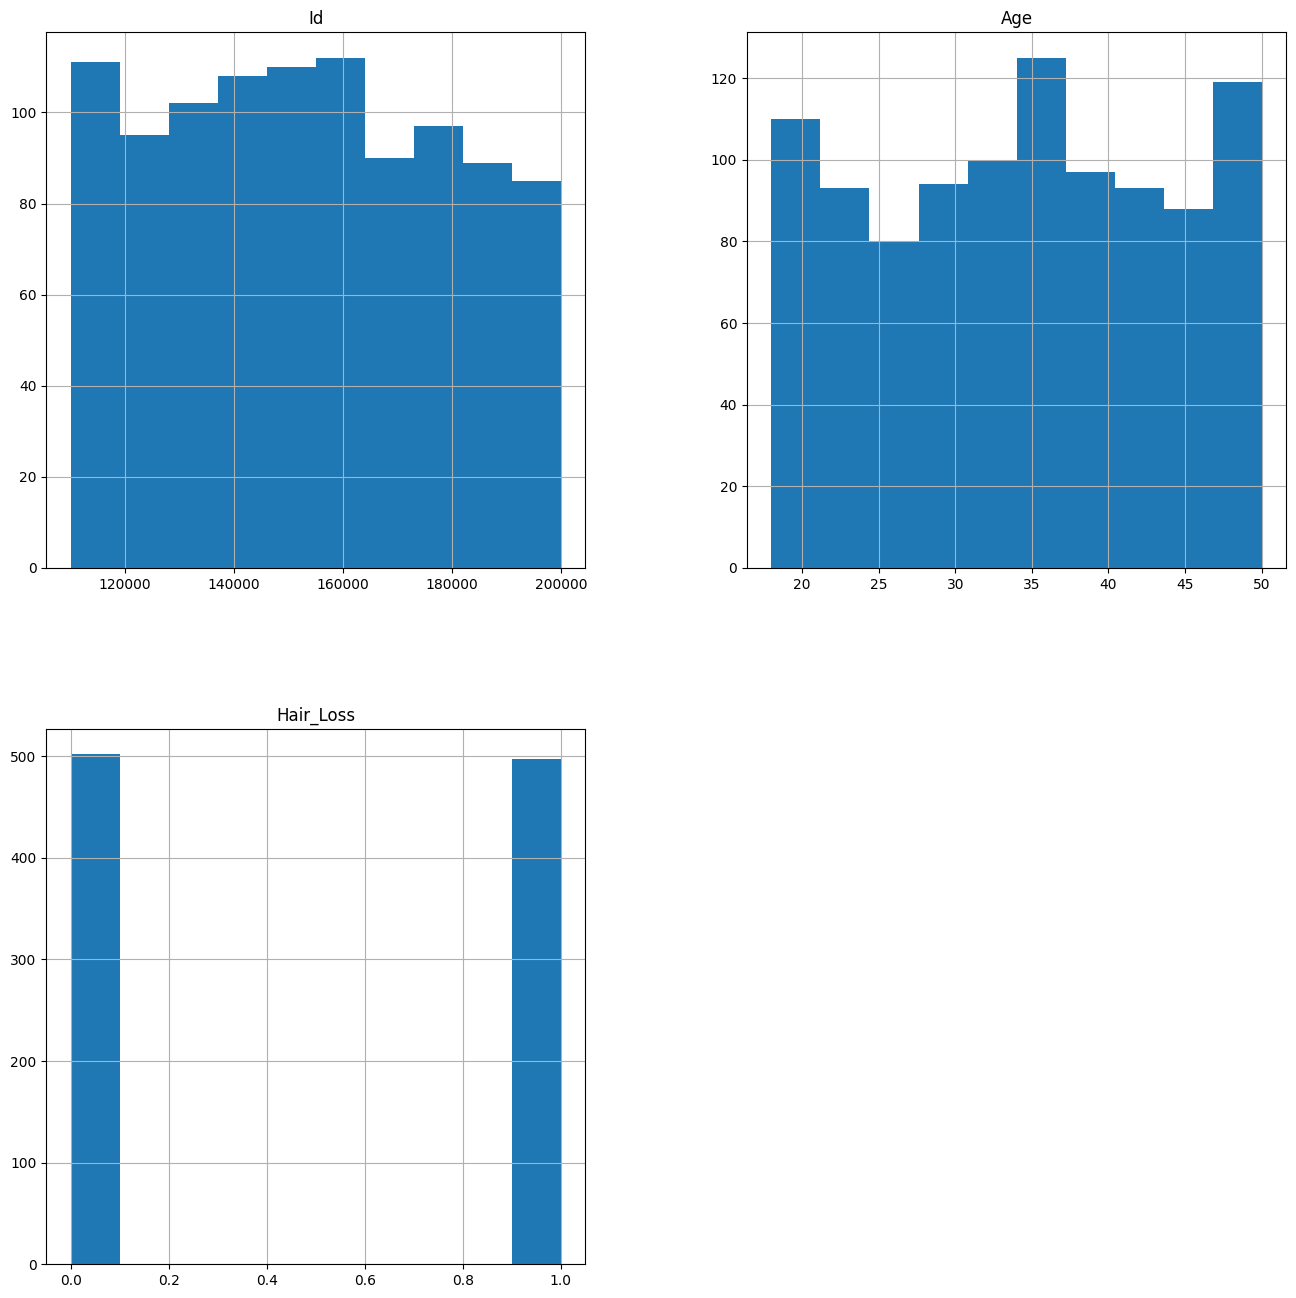

In [ ]:
print("Continuous Variables Visualizationz","\n")
df.hist(column=continous_vars,figsize=(16, 16))
plt.show()

Categorical Variables Visualization_test 



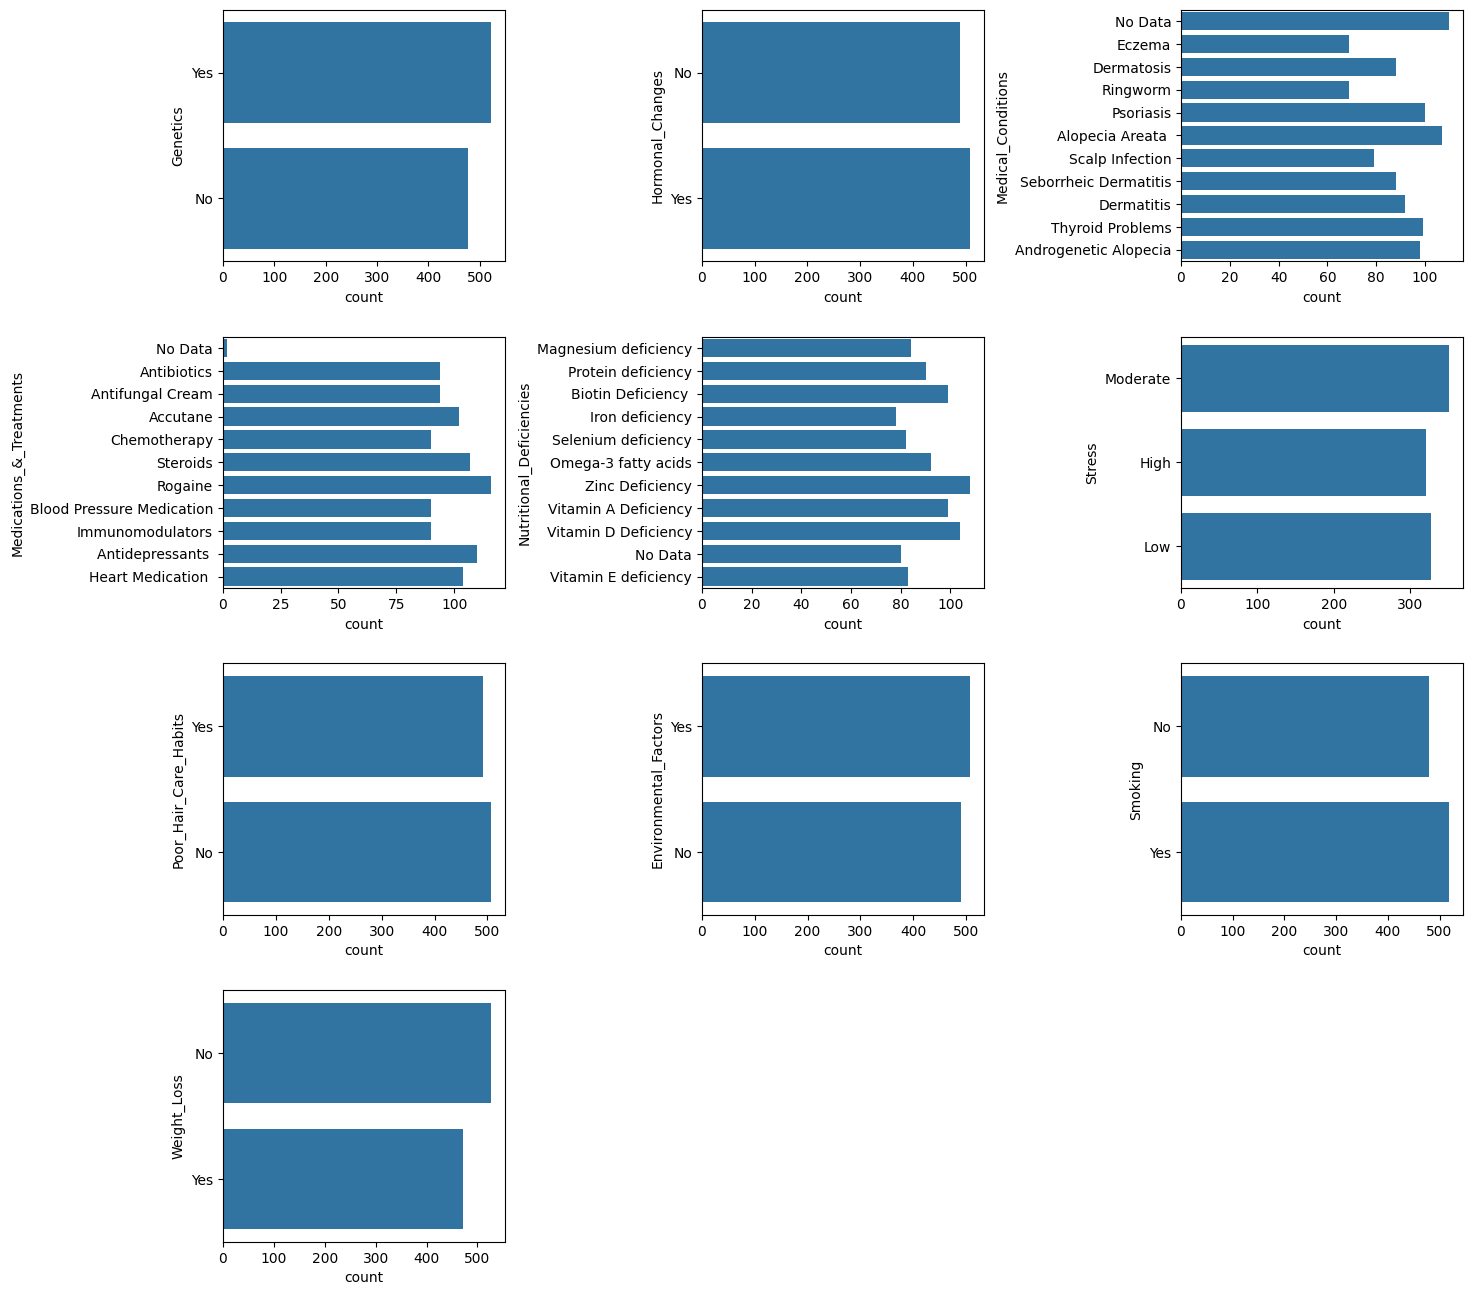

In [ ]:
print("Categorical Variables Visualization_test","\n")
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df, ax=ax)
plt.show()

In [ ]:
df.duplicated().value_counts()

False    999
Name: count, dtype: int64

In [ ]:
df_train = df.drop(["Id"], axis=1)

Continuous Variables 

Index(['Age', 'Hair_Loss'], dtype='object')
Correlation Matrix 



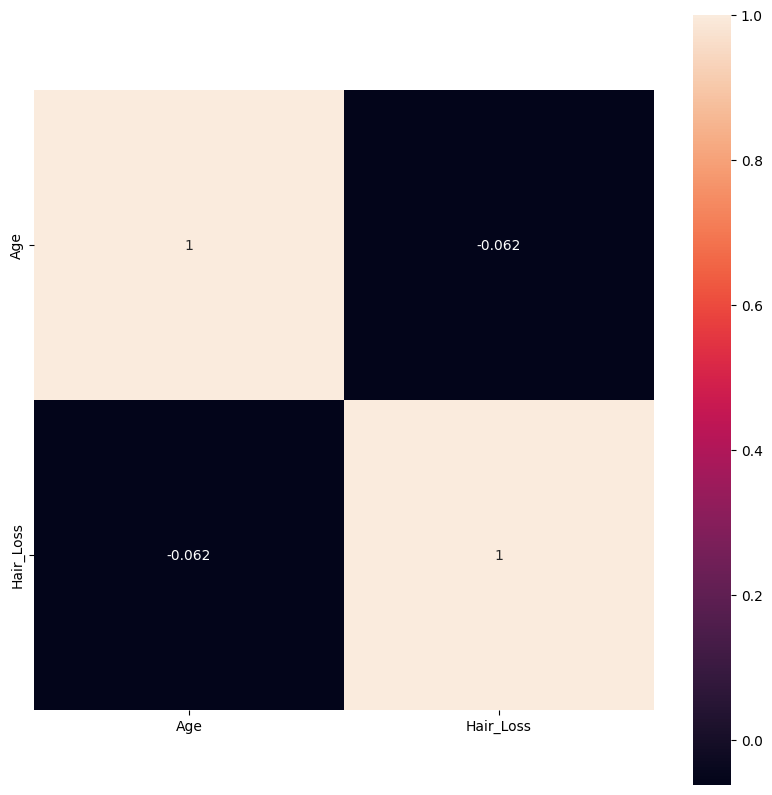

In [ ]:
#히트맵
print("Continuous Variables","\n")
continous_vars=df_train.describe().columns
print(continous_vars)

corrdf = df_train[continous_vars]
print("Correlation Matrix","\n")
corrdf = df_train[continous_vars]
correlation=corrdf.corr(method="pearson")
plt.figure(figsize=(10, 10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

# 다중공선성이 보임

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 60 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Genetics                                            999 non-null    object
 1   Hormonal_Changes                                    999 non-null    object
 2   Medical_Conditions                                  999 non-null    object
 3   Medications_&_Treatments                            999 non-null    object
 4   Nutritional_Deficiencies                            999 non-null    object
 5   Stress                                              999 non-null    object
 6   Age                                                 999 non-null    int64 
 7   Poor_Hair_Care_Habits                               999 non-null    object
 8   Environmental_Factors                               999 non-null    object
 9   Smoking   

In [ ]:
columns = df_train.select_dtypes(include=[object]).columns
df = pd.concat([df_train, pd.get_dummies(df_train[columns])], axis=1)
df = df.drop(['Genetics', 'Hormonal_Changes', 'Medical_Conditions',
       'Medications_&_Treatments', 'Nutritional_Deficiencies_', 'Stress',
       'Poor_Hair_Care_Habits ', 'Environmental_Factors', 'Smoking',
       'Weight_Loss_'], axis =1)
print("\n","Describe Dataset_v2","\n")
print(df.info(),"\n \n \n")

KeyError: "['Nutritional_Deficiencies_', 'Poor_Hair_Care_Habits ', 'Weight_Loss_'] not found in axis"

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
onehot = pd.DataFrame(encoder.fit_transform(df[['Hair_Loss']]).toarray(), columns = encoder.get_feature_names_out())
df = pd.concat([df,onehot], axis = 1)

In [ ]:
df

,Genetics,Hormonal_Changes,Medical_Conditions,Medications_&_Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,...,Poor_Hair_Care_Habits_No,Poor_Hair_Care_Habits_Yes,Environmental_Factors_No,Environmental_Factors_Yes,Smoking_No,Smoking_Yes,Weight_Loss_No,Weight_Loss_Yes,Hair_Loss_0,Hair_Loss_1
0,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,...,False,True,False,True,True,False,True,False,1.0,0.0
1,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,...,False,True,False,True,True,False,True,False,1.0,0.0
2,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,...,False,True,False,True,True,False,False,True,1.0,0.0
3,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,...,False,True,False,True,True,False,True,False,1.0,0.0
4,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,...,True,False,False,True,False,True,True,False,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Yes,No,Seborrheic Dermatitis,Rogaine,Vitamin A Deficiency,Low,33,Yes,Yes,Yes,...,False,True,False,True,False,True,False,True,0.0,1.0
995,Yes,Yes,No Data,Accutane,Protein deficiency,Low,47,No,No,No,...,True,False,True,False,True,False,False,True,1.0,0.0
996,No,Yes,Androgenetic Alopecia,Antidepressants,Protein deficiency,Moderate,20,Yes,No,Yes,...,False,True,True,False,False,True,False,True,0.0,1.0
997,No,Yes,Dermatitis,Immunomodulators,Biotin Deficiency,Moderate,32,Yes,Yes,Yes,...,False,True,False,True,False,True,False,True,0.0,1.0


In [ ]:
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled=pd.DataFrame(min_max_scaler.fit_transform(df),columns=df.columns)

ValueError: could not convert string to float: 'Yes'

In [ ]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 52 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 999 non-null    float64
 1   Hair Loss                                           999 non-null    float64
 2   Genetics_No                                         999 non-null    float64
 3   Genetics_Yes                                        999 non-null    float64
 4   Hormonal Changes_No                                 999 non-null    float64
 5   Hormonal Changes_Yes                                999 non-null    float64
 6   Medical Conditions_Alopecia Areata                  999 non-null    float64
 7   Medical Conditions_Androgenetic Alopecia            999 non-null    float64
 8   Medical Conditions_Dermatitis                       999 non-null    float64
 9  

In [ ]:
print("Correlation Matrix","\n")
correlation=df.corr(method="pearson")
plt.figure(figsize=(100, 100))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

Correlation Matrix 



In [ ]:
y = data_scaled['Hair Loss_0']
data_scaled = data_scaled.drop(['Hair Loss', 'Hair Loss_0','Hair Loss_1'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, cross_val_score

In [ ]:
model = LogisticRegression(solver="saga", max_iter=10000, penalty=None) # Logistic regression
# model = LogisticRegression(max_iter=10000, penalty="l1", C=1.0, solver="saga") # with L1 regularization
# model = LogisticRegression(max_iter=10000, penalty="l2", C=1.0, solver="saga") # with L2 regularization

# Polynomial regression
# model = Pipeline([
#     ("poly_features", PolynomialFeatures(degree=2)),
#     ("softmax_reg", LogisticRegression(solver="saga", max_iter=10000, penalty=None))
# ])
random_state = 42
# Decision tree
# model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=2, min_impurity_decrease=0.0) # Decision tree
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = random_state)
# kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1")

print("Scores from each iteration:", scores)
print("Average score:", scores.mean())

Scores from each iteration: [0.52121212 0.48148148 0.47337278 0.44025157 0.45637584]
Average score: 0.4745387590023819


In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(min_samples_split=2)

# Define the hyperparameters and their possible values
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 5, 10, 20, None],
    "min_impurity_decrease": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1],
}

grid_search = GridSearchCV(model, param_grid, cv=cv, scoring="f1")
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best CV score: {:.6f}".format(grid_search.best_score_))

Best parameters:  {'criterion': 'gini', 'max_depth': 2, 'min_impurity_decrease': 0.01}
Best CV score: 0.668331


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 42)
clf.fit(X_train, y_train)

predict1 = clf.predict(X_test)
print(accuracy_score(y_test, predict1))

0.545


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

model.fit(X_train, y_train)
# model.fit(X_samp, y_samp)

y_prob = model.predict_proba(X_test)
print("Estimated probs:", y_prob[:10])

y_cls = model.predict(X_test)
print("Estimated classes:", y_cls[:10])
print()

Estimated probs: [[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Estimated classes: [1. 0. 0. 0. 1. 1. 0. 1. 0. 1.]



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_cls))
print("F1:", f1_score(y_test, y_cls))
print("ROC AUC:", roc_auc_score(y_test, y_prob[:, 1]))

Accuracy: 0.57
F1: 0.5825242718446602
ROC AUC: 0.5697569756975698


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_cls)
conf_matrix_df = pd.DataFrame(
    conf_matrix,
    columns=["Predicted yes", "Predicted no"],
    index=["Actual yes", "Actual no"]
)
print(conf_matrix_df)

            Predicted yes  Predicted no
Actual yes             54            45
Actual no              41            60


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_cls))

              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56        99
         1.0       0.57      0.59      0.58       101

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.57      0.57      0.57       200



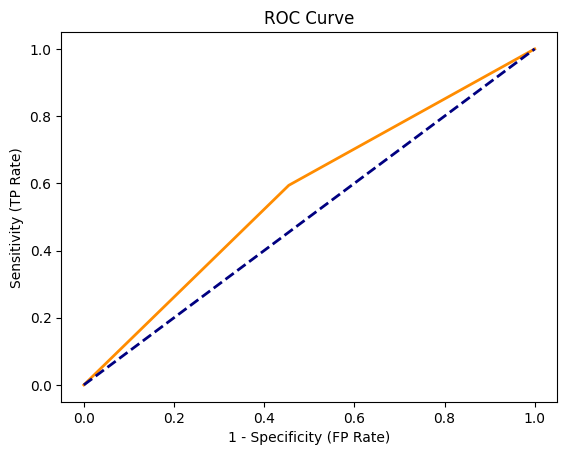

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])

plt.plot(fpr, tpr, color="darkorange", lw=2)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("1 - Specificity (FP Rate)")
plt.ylabel("Sensitivity (TP Rate)")
plt.title("ROC Curve")
plt.show()

In [ ]:
feature_names = df.columns
target_names = ['Yes', 'No']

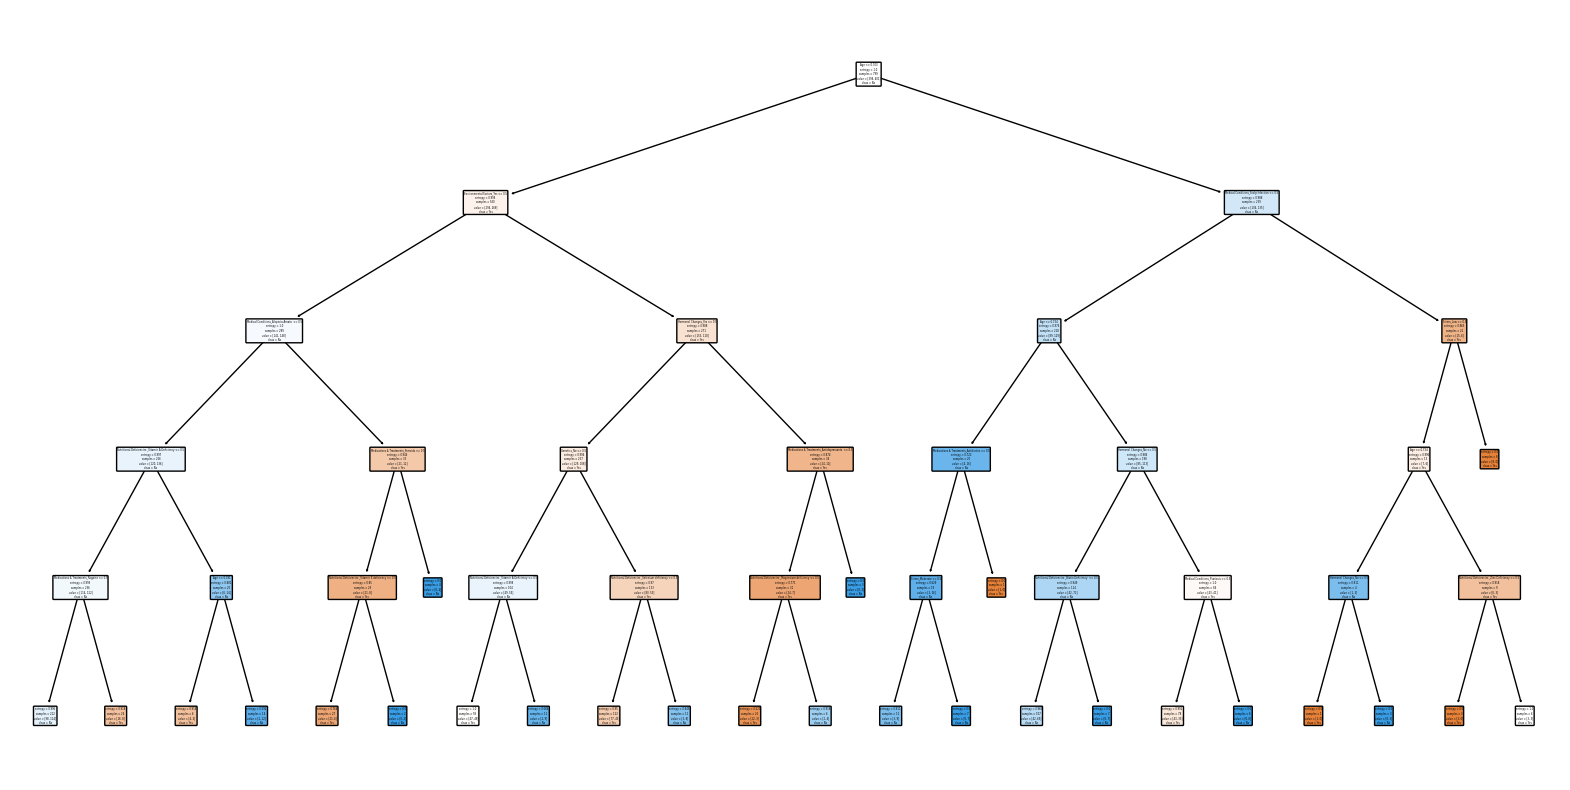

In [ ]:
from sklearn.tree import plot_tree

# Decision tree
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=2, min_impurity_decrease=0.0)
# model = DecisionTreeClassifier(max_depth=3, min_samples_split=2, min_impurity_decrease=0.0)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, impurity=True, feature_names=feature_names, class_names=target_names, rounded=True)
plt.show()